In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

#data_file = pd.read_csv('logfile.dat', delim_whitespace=True,  skiprows=range(0, 42))
#data_file = pd.read_csv('../EquilNPT100/logfile.dat', delim_whitespace=True)
#print data_file.columns

Kb = 0.000086173324
Cant_atomos = 8*8*8*2
Na = 6.02e23


dirs = ['../EquilibrationNpt', '../EquilNPT100', '../EquilNPT1000', \
        '../EquilNPT1200', '../EquilNPT500', '../EquilNPT750']

name = '/logfile.dat'

l_natoms = 0

def lammps_file_dataframe(name):
    with open (name) as f:
        content = f.readlines()
    total_lines = len(content)

    
    for i,line in enumerate(content):
        if line.startswith("Step Press") == True:
           start = i
        if line.startswith("Loop time") == True:
           end = i
        # un parche temporario
        if line.startswith("Total number") == True:
           l_natoms = i
        
    del content[end-1: total_lines]
    del content[0:start]
 
    cols = content[0].split()

    del content[0]    
    matrix = []
    for l in content:
        temp = []
        line = l.split()
        for e in line:
            temp.append(float(e))
        matrix.append(temp)

    data_file = pd.DataFrame(matrix, columns=cols)
    return (data_file)


Nthermal = 200

In [275]:
info = []
for d in dirs:
   file_name = d + name
   print file_name
   data_file = lammps_file_dataframe(file_name)
   count = data_file['Step'].count()
   Nthermal = int(0.2 * count)

   data_file["TotEng2"] = data_file["TotEng"] * data_file["TotEng"]

   dE = data_file["TotEng2"][Nthermal:].mean() -\
        data_file["TotEng"][Nthermal:].mean() * \
        data_file["TotEng"][Nthermal:].mean()
       
   
   dE = dE / (Kb*(Cant_atomos  ** 2))
    
   if data_file["Temp"][Nthermal:].mean() > 290.0:
        if data_file["Temp"][Nthermal:].mean() < 310.0:
          dE = dE / (Kb*(2000  ** 2))
          

   dE = dE / (Kb *(data_file["Temp"][Nthermal:].mean()) ** 2 )
   #dE = dE + 0.59e-5 * data_file["Temp"][Nthermal:].mean() /2
   #dE *= Na * 1.60218e-19
   info.append({"Temp": data_file["Temp"][Nthermal:].mean(), \
                "Lx":data_file["Lx"][Nthermal:].mean()/8, \
                "Density":data_file["Density"][Nthermal:].mean(), \
                "PotEng":data_file["PotEng"][Nthermal:].mean(), \
                "TotEng":data_file["TotEng"][Nthermal:].mean(), \
                "dE":dE, \
                "Press":data_file["Press"][Nthermal:].mean()})

results = pd.DataFrame(info)
results

../EquilibrationNpt/logfile.dat
../EquilNPT100/logfile.dat
../EquilNPT1000/logfile.dat
../EquilNPT1200/logfile.dat
../EquilNPT500/logfile.dat
../EquilNPT750/logfile.dat


,Density,Lx,PotEng,Press,Temp,TotEng,dE
0,12.901522,4.358026,-12542.193958,0.121381,299.659266,-12464.764684,0.000015
1,12.975186,3.479810,-6448.733575,4.009908,99.586891,-6435.564887,0.002664
2,12.619115,3.512241,-6319.554978,20.590594,1002.584114,-6186.980143,0.003164
3,12.532543,3.520310,-6289.097206,7.914621,1198.340654,-6130.636873,0.002806
4,12.825134,3.493330,-6393.595903,-0.635915,500.815193,-6327.371544,0.002725
5,12.724754,3.502493,-6357.230722,10.642360,752.572212,-6257.715746,0.003140


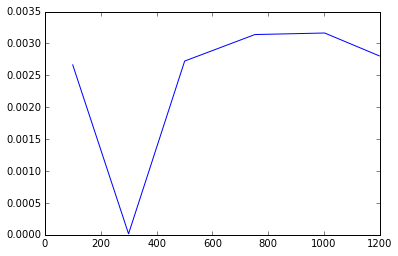

In [276]:
 
a=results.sort_values(by="Temp", ascending=1)
plt.plot(a["Temp"], a["dE"])

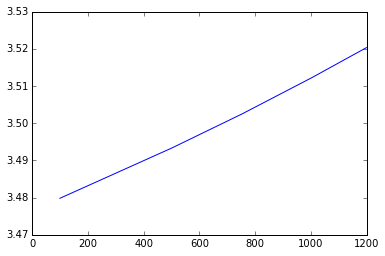

In [181]:
plt.plot(a["Temp"], a["Lx"])

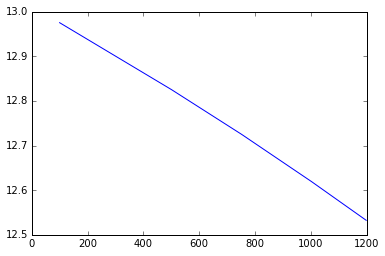

In [182]:
plt.plot(a["Temp"], a["Density"])

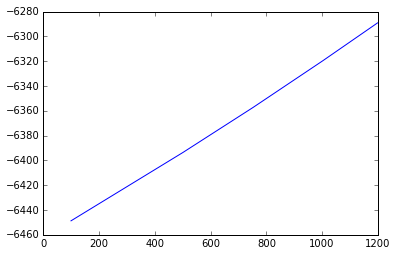

In [183]:
plt.plot(a["Temp"], a["PotEng"])

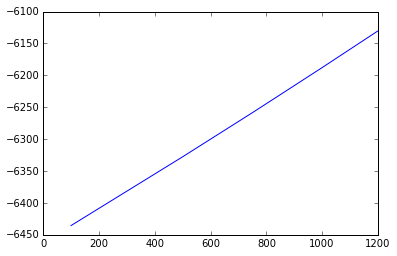

In [184]:
plt.plot(a["Temp"], a["TotEng"])

In [185]:
data_file = lammps_file_dataframe(file_name, 1000, 53)

In [186]:
data_file[0:4]

,Step,Press,KinEng,PotEng,TotEng,Lx,Volume,Temp,Density,Fmax,Fnorm
0,0,4926.177100,99.174846,-6461.9626,-6362.7877,27.812800,21514.643,750.00000,13.011158,2.311432e-14,4.803390e-13
1,100,-12304.149000,45.116743,-6408.1891,-6363.0723,28.001725,21956.058,341.19093,12.749575,2.345575e+00,2.722825e+01
2,200,3594.816600,56.231968,-6419.4087,-6363.1767,27.873083,21654.843,425.24872,12.926919,2.355109e+00,2.822026e+01
3,300,-66.907051,52.422360,-6414.6639,-6362.2415,27.909987,21740.969,396.43893,12.875710,2.525143e+00,3.060703e+01


In [187]:
# data_file.info, data_file.dtypes
data_file[Nthermal:].describe()

,Step,Press,KinEng,PotEng,TotEng,Lx,Volume,Temp,Density,Fmax,Fnorm
count,799.000000,799.00000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,59900.000000,8.78708,99.514395,-6357.232075,-6257.717681,28.019956,21998.995418,752.567806,12.724736,3.111052,43.830077
std,23079.572497,2204.57382,2.561482,2.640011,3.725602,0.017721,41.737557,19.370952,0.024143,0.296857,0.761263
min,20000.000000,-7338.58280,91.413659,-6364.723200,-6266.780100,27.961505,21861.584000,691.306780,12.652050,2.421576,41.353823
25%,39950.000000,-1530.52490,97.791699,-6359.081700,-6260.578550,28.007717,21970.155500,739.540090,12.708371,2.886242,43.306913
50%,59900.000000,5.91430,99.409186,-6357.348500,-6258.283200,28.020495,22000.240000,751.772170,12.723971,3.073182,43.815069
75%,79850.000000,1532.61860,101.301715,-6355.331050,-6254.630900,28.031956,22027.246500,766.084205,12.741394,3.288262,44.345042
max,99800.000000,6740.23650,106.645020,-6348.819500,-6249.770000,28.073489,22125.301000,806.492460,12.804672,4.366371,46.401865


In [188]:
count = data_file['Step'].count()
print count

999


count    799.000000
mean      28.019956
std        0.017721
min       27.961505
25%       28.007717
50%       28.020495
75%       28.031956
max       28.073489
Name: Lx, dtype: float64

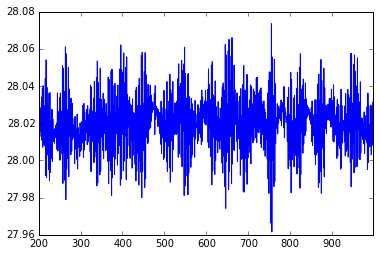

In [189]:
#Energia = data_file['KinEng'] + data_file['PotEng']
temperatura = data_file['Lx']
N =200

temperatura_calculo = temperatura[N:]
temperatura_calculo.plot()
temperatura_calculo.describe()



In [44]:
Kb = 0.000086173324
T = 300
Cant_atomos = 8*8*8*2

Energia = (data_file['PotEng'][N:] +  data_file['TotEng'][N:]) / Cant_atomos
Emean2 = Energia.mean() ** 2
E2 = Energia ** 2
DE = E2.mean() - Emean2


print DE/(Kb*T*T)


6.68497873745e-08


In [53]:
from scipy.signal import wiener, filtfilt, butter, gaussian, freqz

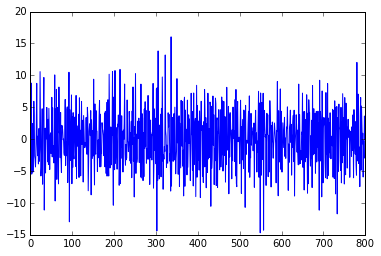

In [35]:
b, a = butter(2, 0.2, btype="highpass")
fl = filtfilt(b, a, temperatura_calculo)
plt.plot(fl)

In [36]:
np.mean(fl), np.std(fl)

(0.0078599708538560943, 4.5611192418908697)